## Assignment 7

#### Name : Raswanth S.R
#### RollNum : CB.EN.U4CSE19648

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/RASWANTH.SR/Desktop/ML Lab/FDS Lab/csv/heart_v2.csv")

In [3]:
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [4]:
X = df.drop('heart disease',axis =1)

In [5]:
y = df["heart disease"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7,random_state=42)

In [8]:
X_train.shape

(81, 4)

In [9]:
X_test.shape

(189, 4)

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True)

In [12]:
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [13]:
classifier_rf.oob_score_

0.6049382716049383

In [14]:
classifier_rf.score(X_test,y_test)

0.6825396825396826

In [15]:
rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [16]:
params ={
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
grid_search = GridSearchCV(estimator=rf,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")

In [19]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   51.8s finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [20]:
grid_search.best_score_

0.6672619047619048

In [21]:
rf_best = grid_search.best_estimator_

In [22]:
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=20, n_estimators=200,
                       n_jobs=-1, random_state=42)

[Text(1674.0, 2038.5, 'BP <= 139.0\ngini = 0.494\nsamples = 53\nvalue = [45, 36]\nclass = Disease'),
 Text(837.0, 679.5, 'gini = 0.402\nsamples = 27\nvalue = [31, 12]\nclass = Disease'),
 Text(2511.0, 679.5, 'gini = 0.465\nsamples = 26\nvalue = [14, 24]\nclass = No Disease')]

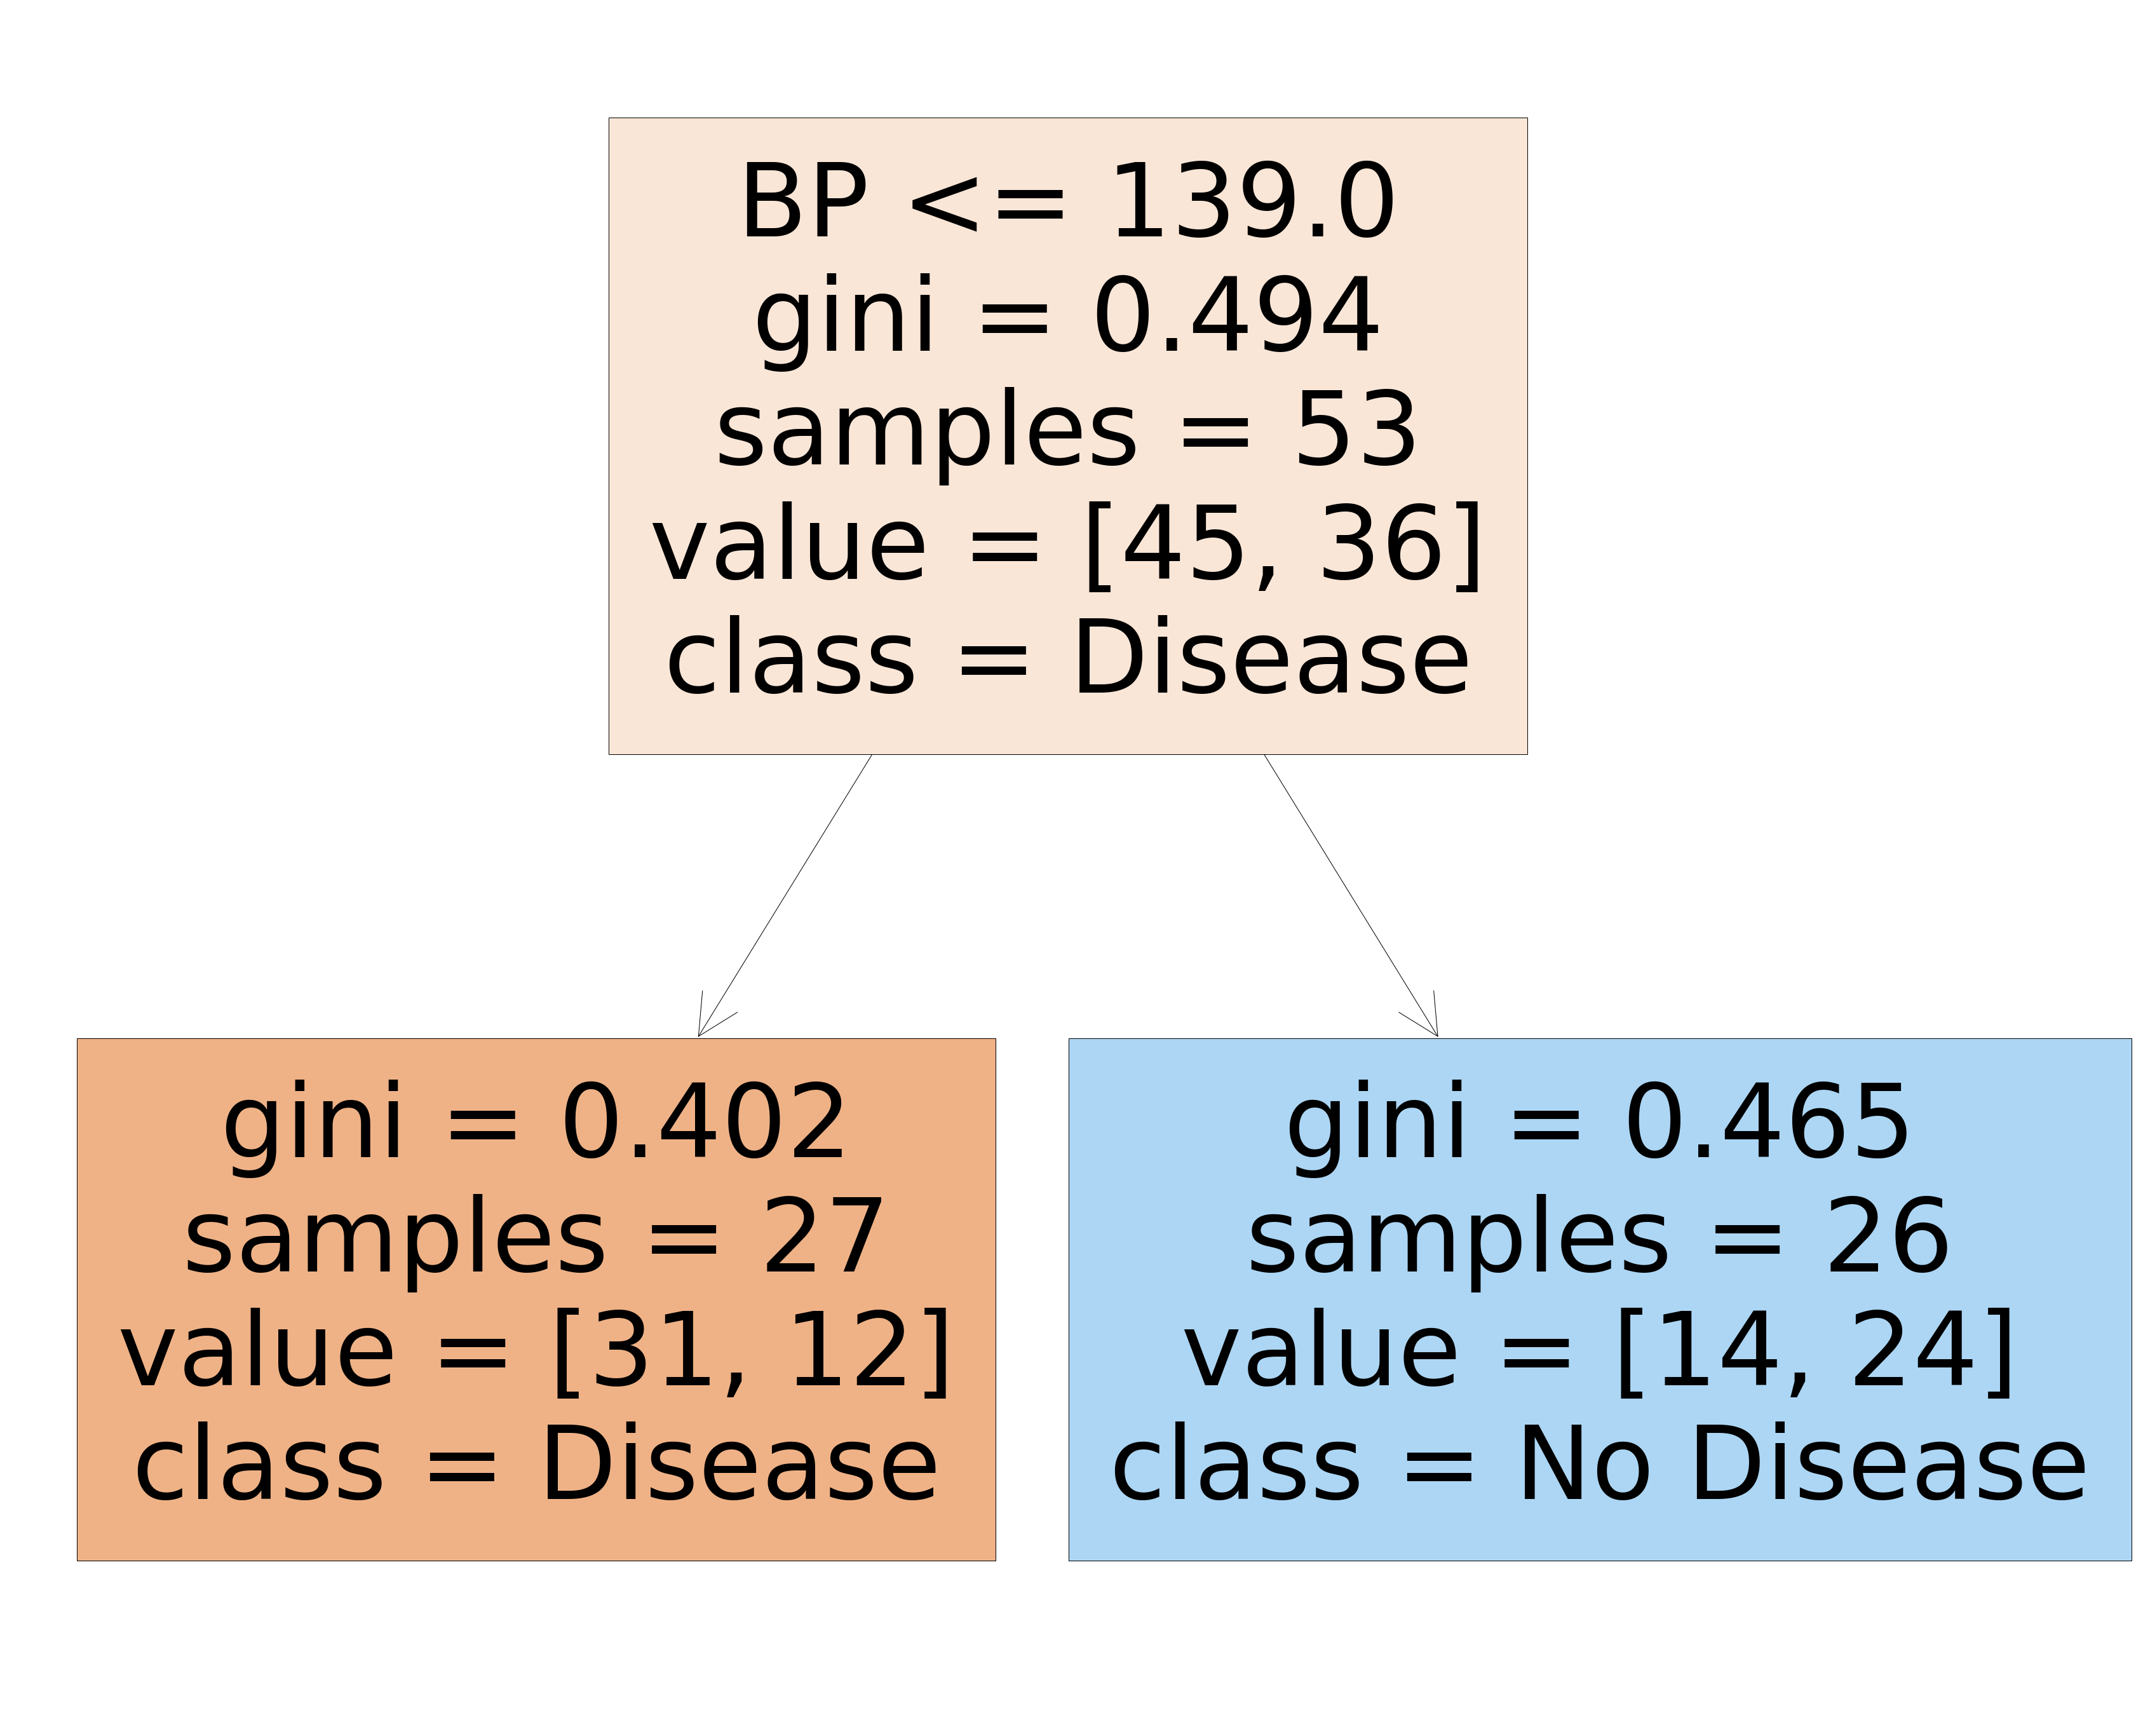

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,50))
plot_tree(rf_best.estimators_[5],feature_names=X.columns,class_names=["Disease","No Disease"],filled=True)

[Text(1674.0, 2038.5, 'age <= 54.5\ngini = 0.499\nsamples = 56\nvalue = [42, 39]\nclass = Disease'),
 Text(837.0, 679.5, 'gini = 0.401\nsamples = 25\nvalue = [26, 10]\nclass = Disease'),
 Text(2511.0, 679.5, 'gini = 0.458\nsamples = 31\nvalue = [16, 29]\nclass = No Disease')]

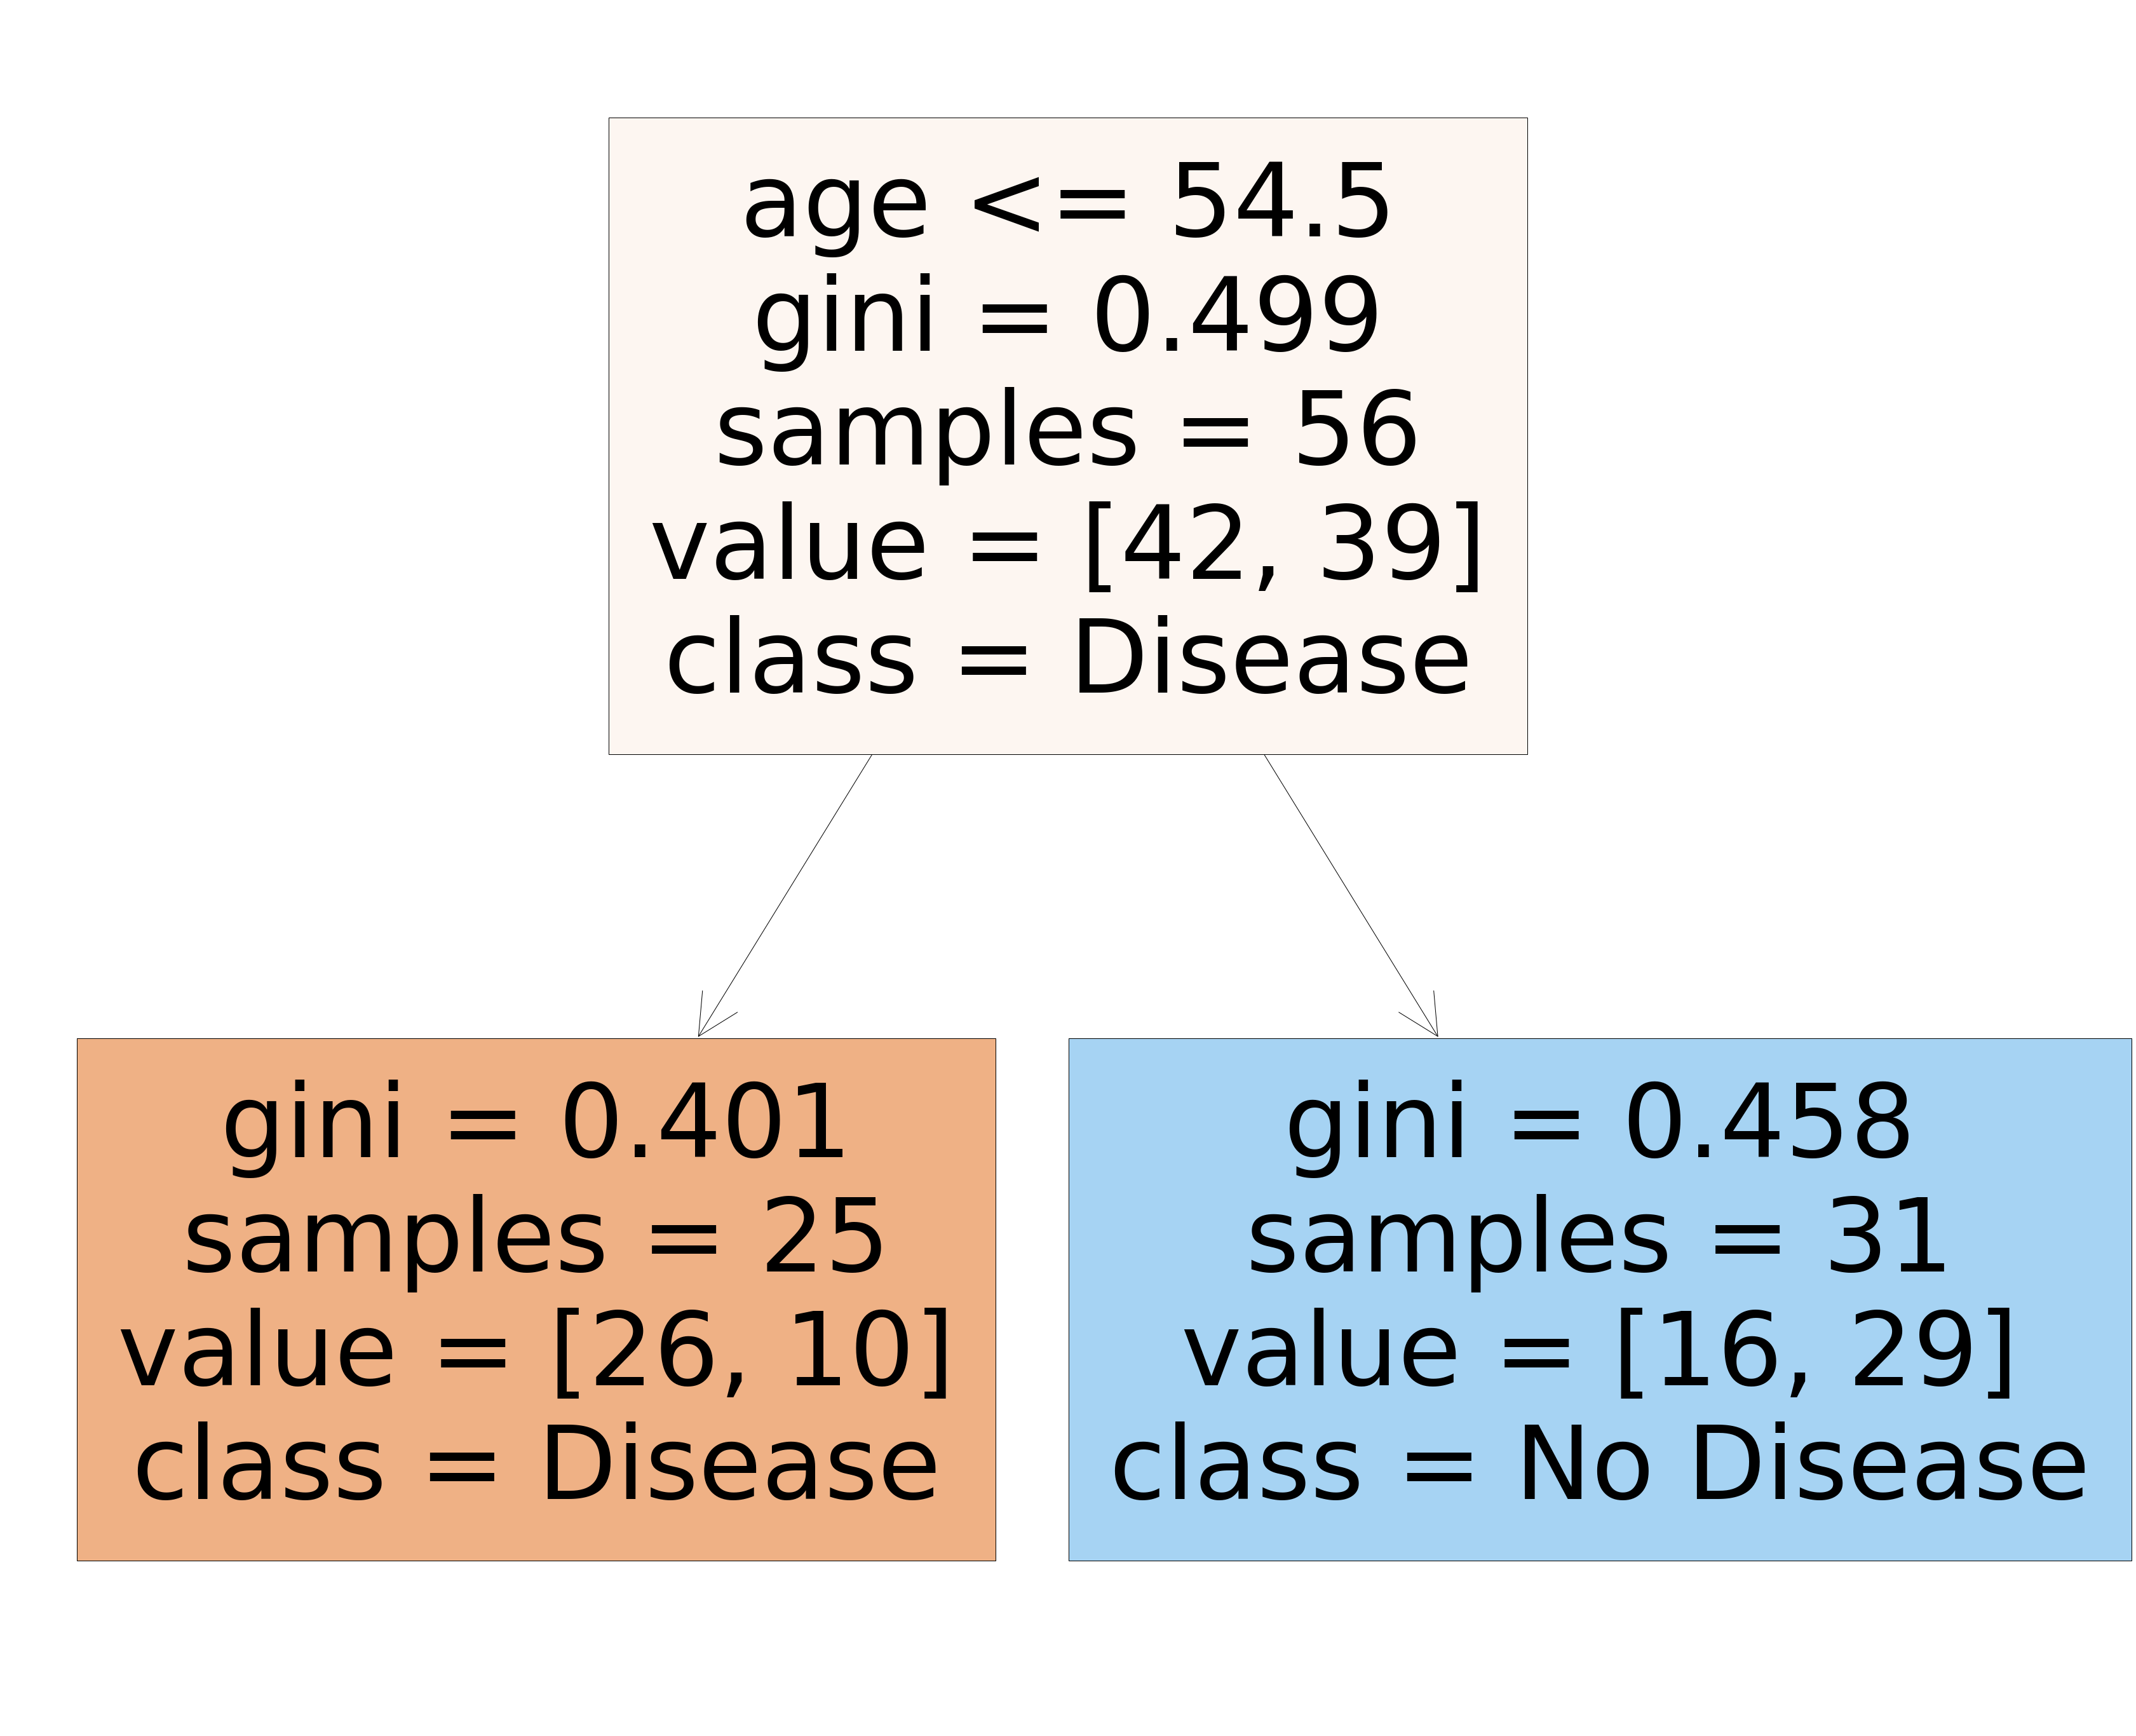

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,50))
plot_tree(rf_best.estimators_[7],feature_names=X.columns,class_names=["Disease","No Disease"],filled=True)

In [28]:
rf_best.feature_importances_

array([0.5  , 0.07 , 0.235, 0.195])

In [29]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp" : rf_best.feature_importances_
})

In [30]:
imp_df.sort_values(by="Imp",ascending = False)

,Varname,Imp
0,age,0.500
2,BP,0.235
3,cholestrol,0.195
1,sex,0.070


In [31]:
from sklearn.metrics import confusion_matrix
y_pred = rf_best.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[79, 30],
       [45, 35]], dtype=int64)

Text(69.0, 0.5, 'Truth')

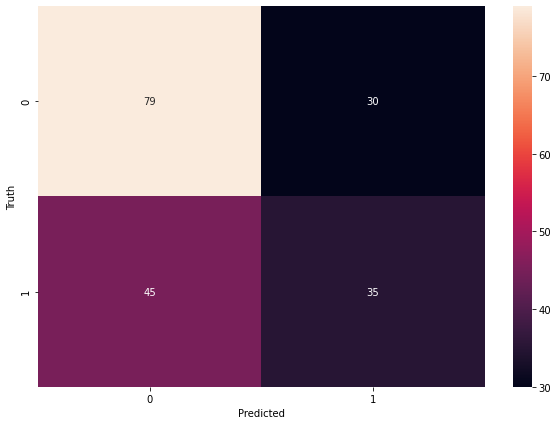

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.72      0.68       109
           1       0.54      0.44      0.48        80

    accuracy                           0.60       189
   macro avg       0.59      0.58      0.58       189
weighted avg       0.60      0.60      0.60       189



In [36]:
from sklearn.metrics import confusion_matrix
y_pred1 = classifier_rf.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred)
cm1

array([[76, 33],
       [27, 53]], dtype=int64)

Text(69.0, 0.5, 'Truth')

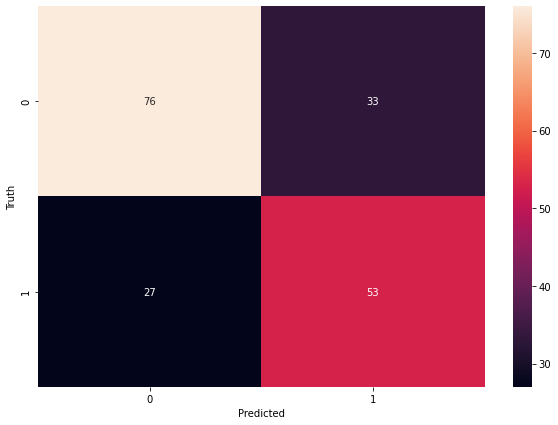

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       109
           1       0.62      0.66      0.64        80

    accuracy                           0.68       189
   macro avg       0.68      0.68      0.68       189
weighted avg       0.69      0.68      0.68       189

